In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data_set = pd.read_csv("linear-regression.csv")
x= data_set.iloc[:,:-1]
y = data_set.iloc[:,-1]

categorical_features = [index for index, dtype in enumerate(data_set.dtypes)
                        if pd.api.types.is_categorical_dtype(dtype) or pd.api.types.is_object_dtype(dtype)]

# Perform one-hot encoding (if necessary)
if categorical_features:
    x = pd.get_dummies(x, columns=[x.columns[i] for i in categorical_features], drop_first=True)

# Convert X to NumPy array (if needed for further processing)
x = x.values
y = y.values 

C:\Users\Dell\AppData\Local\Temp\ipykernel_2604\3515865149.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype) or pd.api.types.is_object_dtype(dtype)]


In [3]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [4]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.375, random_state=42) 

In [6]:
x_train

array([[ 6.9  ,  0.685,  0.   , ...,  3.46 ,  0.57 , 10.6  ],
       [ 5.2  ,  0.34 ,  0.   , ...,  3.68 ,  0.79 , 14.   ],
       [10.3  ,  0.53 ,  0.48 , ...,  3.12 ,  0.59 ,  9.3  ],
       ...,
       [12.8  ,  0.3  ,  0.74 , ...,  3.2  ,  0.77 , 10.8  ],
       [ 7.5  ,  0.685,  0.07 , ...,  3.38 ,  0.55 , 10.9  ],
       [ 6.5  ,  0.615,  0.   , ...,  3.46 ,  0.65 ,  9.2  ]])

In [7]:
x_test

array([[ 7.7  ,  0.56 ,  0.08 , ...,  3.24 ,  0.66 ,  9.6  ],
       [ 7.8  ,  0.5  ,  0.17 , ...,  3.39 ,  0.48 ,  9.5  ],
       [10.7  ,  0.67 ,  0.22 , ...,  3.28 ,  0.98 ,  9.9  ],
       ...,
       [ 8.3  ,  0.6  ,  0.25 , ...,  3.15 ,  0.53 ,  9.8  ],
       [ 8.8  ,  0.27 ,  0.39 , ...,  3.15 ,  0.69 , 11.2  ],
       [ 9.1  ,  0.765,  0.04 , ...,  3.29 ,  0.54 ,  9.7  ]])

In [8]:
y_test

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [9]:
y_train

array([6, 6, 6, 7, 5, 5, 4, 6, 5, 5, 6, 6, 6, 5, 5, 6, 7, 6, 5, 7, 6, 7,
       6, 6, 6, 5, 5, 6, 5, 5, 7, 5, 7, 5, 5, 5, 5, 6, 4, 6, 7, 5, 6, 7,
       7, 5, 5, 5, 3, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 7, 6, 5, 6, 5, 5,
       6, 5, 5, 7, 6, 5, 6, 5, 5, 6, 7, 7, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6,
       5, 5, 6, 5, 6, 6, 6, 5, 7, 3, 5, 6, 6, 5, 5, 6, 7, 7, 5, 6, 6, 5,
       6, 5, 6, 6, 5, 5, 4, 8, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 4, 6, 5,
       6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 7, 6, 6, 5, 6, 3, 5, 5, 6, 5, 5, 6,
       7, 5, 6, 5, 6, 6, 5, 7, 6, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 6,
       6, 6, 6, 6, 6, 6, 7, 5, 5, 5, 5, 6, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7,
       6, 5, 6, 4, 5, 5, 4, 3, 5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 3, 6, 5,
       5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 4, 7, 5, 6, 5, 6, 7, 6, 5, 5, 5, 7,
       7, 7, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 7, 6, 5, 7,
       6, 5, 7, 6, 7, 5, 6, 7, 5, 5, 5, 5, 5, 6, 5, 5, 6, 7, 5, 6, 5, 6,
       7, 6, 4, 6, 7, 5, 7, 5, 7, 6, 5, 6, 6, 6, 5,

In [10]:
scaler = MinMaxScaler()  
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred


array([5.343809  , 5.17394099, 5.58348638, 5.39068968, 5.72882138,
       5.25493039, 5.13092101, 5.10870953, 5.75332469, 5.66465553,
       6.07307217, 5.24618114, 5.54627067, 5.20267798, 5.47719336,
       6.55548753, 5.18239009, 5.62154739, 6.55394324, 5.30014071,
       5.42631585, 5.19698537, 6.00084367, 6.39313198, 5.37620702,
       5.42679099, 6.4097187 , 5.41503506, 5.18944189, 6.29969321,
       5.262961  , 5.59626013, 5.76260979, 5.34109865, 5.42929394,
       5.08926133, 6.16718076, 5.69441847, 5.6209179 , 6.21724686,
       5.46538723, 5.32237895, 6.16074269, 5.22909234, 5.85604237,
       5.79230455, 6.47427893, 5.61226579, 5.0936268 , 5.56130711,
       5.13191813, 5.1414112 , 5.59210606, 6.42557479, 5.0101552 ,
       4.99816544, 5.99833911, 5.43218739, 5.87584894, 5.22610726,
       5.61439063, 6.02417141, 5.28027299, 5.40110905, 6.57121055,
       5.44698004, 6.40901923, 5.26837273, 6.42977637, 5.33450806,
       6.51587352, 4.74017172, 5.78905206, 5.84891981, 6.19515

In [12]:
def gradient_ascent(x, y, learning_rate, epochs):
  m = len(y)  
  weights = np.zeros(x.shape[1])  

  for epoch in range(epochs):
    predicted_y = np.dot(x, weights)
    errors = predicted_y - y
    gradient = np.dot(x.T, errors) / m
    weights += learning_rate * gradient
    return weights
weights_001 = gradient_ascent(x_train, y_train, 0.01, 1000)
weights_0001 = gradient_ascent(x_train, y_train, 0.001, 1000)
weights_00001 = gradient_ascent(x_train, y_train, 0.0001, 1000)

In [13]:

y_pred_001 = np.dot(x_test, weights_001)
y_pred_0001 = np.dot(x_test, weights_0001)
y_pred_00001 = np.dot(x_test, weights_00001)
r2_001 = r2_score(y_test, y_pred_001)
r2_002 = r2_score(y_test, y_pred_0001)
r2_003 = r2_score(y_test, y_pred_00001)


In [14]:
mse_001 = mean_squared_error(y_test, y_pred_001)
mse_0001 = mean_squared_error(y_test, y_pred_0001)
mse_00001 = mean_squared_error(y_test, y_pred_00001)

rmse_001 = np.sqrt(mse_001)
rmse_0001 = np.sqrt(mse_0001)
rmse_00001 = np.sqrt(mse_00001)

In [15]:
r2_002

-49.53911687615131

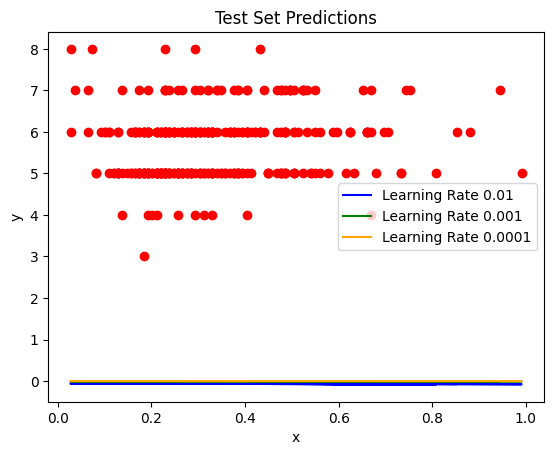

In [16]:
plt.scatter(x_test[:, 0], y_test, color='red')  # Assuming the first feature for x-axis
plt.plot(x_test[:, 0], y_pred_001, color='blue', label='Learning Rate 0.01')
plt.plot(x_test[:, 0], y_pred_0001, color='green', label='Learning Rate 0.001')
plt.plot(x_test[:, 0], y_pred_00001, color='orange', label='Learning Rate 0.0001')
plt.title("Test Set Predictions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [17]:
rmse_001 

5.79553040290552

In [18]:

rmse_0001

5.746965199668677

In [19]:

rmse_00001 

5.742109428862472